In [1]:
import math

import pandas as pd
import seaborn as sns
from glob import glob
from datetime import datetime
import math

In [5]:
dfs = []
dates=[]
dates_years=[]
i=0
previous_columns = set()
for filename in sorted(glob("original/TOP500_*.xl*")):
    print(f"\n\n# reading {filename}")
    df1 = pd.read_excel(filename)
    if (df1.columns[0].startswith("Unnamed")):
#    print(df1.iloc[0, 0])
#    if (pd.isnull(df1.iloc[0, 0])):
        df1 = pd.read_excel(filename, skiprows=1)
#    else:
#        df1 = pd.read_excel(filename)
    if filename.endswith("xls"):
        d = datetime.strptime(filename, "original/TOP500_%Y%m.xls")
    else:
        d = datetime.strptime(filename, "original/TOP500_%Y%m.xlsx")
    if i%4==0:
        dates.append(str(d.month)+'/'+str(d.year))
    else:
        dates.append('')
    dates_years.append(d.year)
    i=i+1
    df1 = df1.rename(columns={"Rmax": "RMax"})
    df1 = df1.rename(columns={"Processor Generation": "Processor Family"})
    if ("Rmax [TFlop/s]" in df1.columns):
        df1 = df1.rename(columns={"Rmax [TFlop/s]": "RMax"})
        df1["RMax"] = df1["RMax"]*1000
    if ("Processor Family" not in df1.columns):
        print(df1.columns)
    dfs.append(df1)
#    print(d)
#    print(df1.columns)



# reading original/TOP500_199306.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# reading original/TOP500_199311.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# reading original/TOP500_199406.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# reading original/TOP500_199411.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# reading original/TOP500_199506.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# reading original/TOP500_199511.xls
WARNING *** OLE2 inconsistency: SSCS

6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 nCube
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 KSR
6/1993 KSR
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 nCube
6/1993 nCube
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Maspar
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Convex
6/1993 Convex
6/1993 Convex
6

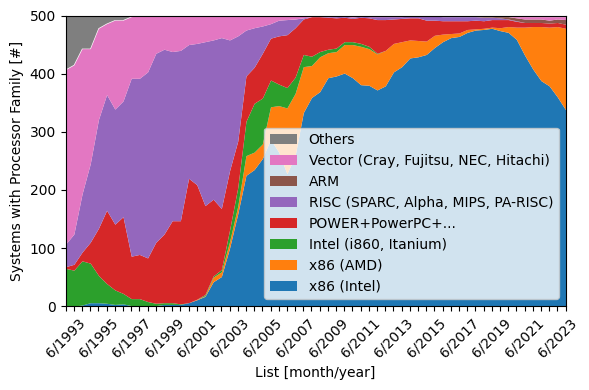

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

families=["x86 (Intel)","x86 (AMD)","Intel (i860, Itanium)","POWER+PowerPC+...","RISC (SPARC, Alpha, MIPS, PA-RISC)","ARM","Vector (Cray, Fujitsu, NEC, Hitachi)","Others"]
counts=[]
i=0
for df in dfs:
#    print(dates[i])
#    df['Manufacturer'] = df['Manufacturer'].str.slice(0, 20)
    element_counts = Counter(df["Processor Family"])
    new_single_count=[]
    for element in families:
        new_single_count.append(0)
    for index, row in df.iterrows():
        element=row["Processor Family"]
        if element.find("Xeon")>-1 or element.find("Intel EM64T")>-1 or element.find("Intel IA32")>-1 or element.find("Intel IA-32")>-1 or element.find("Intel Core") > -1 or element.find("Core i5")>-1:
            new_single_count[0]+=1
        elif element.find("Opteron")>-1 or element.find("AMD")>-1:
            new_single_count[1]+=1
        elif element.find("Itanium")>-1 or element.find("IA-64")>-1 or element.find("i860")>-1:
            new_single_count[2]+=1
        elif element.find("POWER")>-1 or element.find("Power")>-1:
            new_single_count[3]+=1
        elif element.find("Sparc")>-1 or element.find("SPARC")>-1 or element.find("MIPS")>-1 or element.find("Alpha")>-1 or element.find("PA-RISC")>-1:
            new_single_count[families.index("RISC (SPARC, Alpha, MIPS, PA-RISC)")]+=1
        elif element.find("Thunder")>-1 or element.find("ARM")>-1 or element.find("A64FX")>-1:
            new_single_count[families.index("ARM")]+=1
        # must come after ARM!
        elif element.find("Cray")>-1 or element.find("Fujitsu")>-1 or element.find("NEC")>-1 or element.find("Hitachi")>-1 or element.find("Vector Engine")>-1:
            new_single_count[families.index("Vector (Cray, Fujitsu, NEC, Hitachi)")]+=1
        else:
            print(dates[i], element)
            new_single_count[len(families)-1]+=element_counts[element]
    counts.append(new_single_count)
    i+=1
df_plot=pd.DataFrame(counts, columns=families)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Systems with Processor Family [#]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,500),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
#ax.get_legend().remove()
plt.savefig('processors-over-time.png', dpi=300)



6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 nCube
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 KSR
6/1993 KSR
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 nCube
6/1993 nCube
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Maspar
6/1993 TMC CM2
6/1993 TMC CM2
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Convex
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 KSR
6/1993 KSR
6/1993 KSR
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Maspar
6/1993 Convex
6/1993 Convex
6/1993 Convex
6

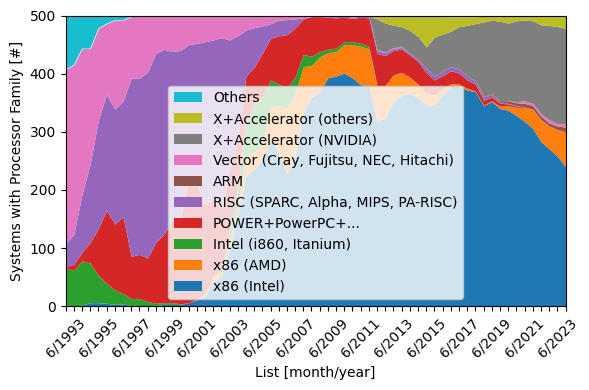

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

families=["x86 (Intel)","x86 (AMD)","Intel (i860, Itanium)","POWER+PowerPC+...","RISC (SPARC, Alpha, MIPS, PA-RISC)","ARM","Vector (Cray, Fujitsu, NEC, Hitachi)","X+Accelerator (NVIDIA)","X+Accelerator (others)","Others"]
counts=[]
i=0
for df in dfs:
#    print(dates[i])
#    df['Manufacturer'] = df['Manufacturer'].str.slice(0, 20)
    element_counts = Counter(df["Processor Family"])
    acc_column=None
    if "Accelerator/Co-Processor" in df.columns:
        acc_column="Accelerator/Co-Processor"
    new_single_count=[]
    for element in families:
        new_single_count.append(0)
    for index, row in df.iterrows():
        element=row["Processor Family"]
        if acc_column != None and row[acc_column]!="None":
            if (row[acc_column].find("NVIDIA"))>-1:
                new_single_count[families.index("X+Accelerator (NVIDIA)")]+=1
                continue
            else:
                new_single_count[families.index("X+Accelerator (others)")]+=1
                continue
        if element.find("Xeon")>-1 or element.find("Intel EM64T")>-1 or element.find("Intel IA32")>-1 or element.find("Intel IA-32")>-1 or element.find("Intel Core") > -1 or element.find("Core i5")>-1:
            new_single_count[0]+=1
        elif element.find("Opteron")>-1 or element.find("AMD")>-1:
            new_single_count[1]+=1
        elif element.find("Itanium")>-1 or element.find("IA-64")>-1 or element.find("i860")>-1:
            new_single_count[2]+=1
        elif element.find("POWER")>-1 or element.find("Power")>-1:
            new_single_count[3]+=1
        elif element.find("Sparc")>-1 or element.find("SPARC")>-1 or element.find("MIPS")>-1 or element.find("Alpha")>-1 or element.find("PA-RISC")>-1:
            new_single_count[families.index("RISC (SPARC, Alpha, MIPS, PA-RISC)")]+=1
        elif element.find("Thunder")>-1 or element.find("ARM")>-1 or element.find("A64FX")>-1:
            new_single_count[families.index("ARM")]+=1
        # must come after ARM!
        elif element.find("Cray")>-1 or element.find("Fujitsu")>-1 or element.find("NEC")>-1 or element.find("Hitachi")>-1 or element.find("Vector Engine")>-1:
            new_single_count[families.index("Vector (Cray, Fujitsu, NEC, Hitachi)")]+=1
        else:
            print(dates[i], element)
            new_single_count[len(families)-1]+=element_counts[element]
    counts.append(new_single_count)
    i+=1
df_plot=pd.DataFrame(counts, columns=families)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Systems with Processor Family [#]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,500),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
#ax.get_legend().remove()
plt.savefig('processors-over-time-accel.png', dpi=300)



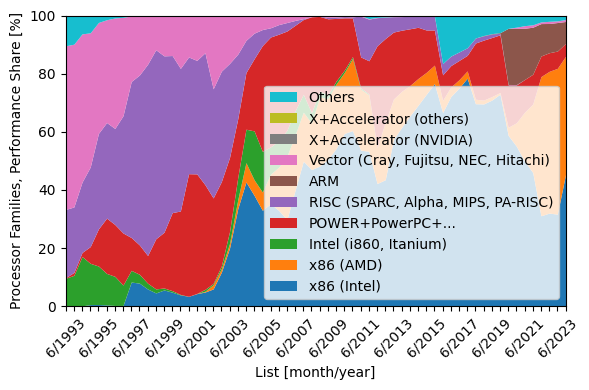

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

families=["x86 (Intel)","x86 (AMD)","Intel (i860, Itanium)","POWER+PowerPC+...","RISC (SPARC, Alpha, MIPS, PA-RISC)","ARM","Vector (Cray, Fujitsu, NEC, Hitachi)","X+Accelerator (NVIDIA)","X+Accelerator (others)","Others"]
counts=[]
i=0
for df in dfs:
#    print(dates[i])
#    df['Manufacturer'] = df['Manufacturer'].str.slice(0, 20)
    new_single_count=[]
    for element in families:
        new_single_count.append(0)
    new_sum=df["RMax"].sum()
    for index, row in df.iterrows():
        element=row["Processor Family"]
        if element.find("Xeon")>-1 or element.find("Intel EM64T")>-1 or element.find("Intel IA32")>-1 or element.find("Intel IA-32")>-1 or element.find("Intel Core") > -1 or element.find("Core i5")>-1:
            new_single_count[0]+=row["RMax"]*100.0/new_sum
        elif element.find("Opteron")>-1 or element.find("AMD")>-1:
            new_single_count[1]+=row["RMax"]*100.0/new_sum
        elif element.find("Itanium")>-1 or element.find("IA-64")>-1 or element.find("i860")>-1:
            new_single_count[2]+=row["RMax"]*100.0/new_sum
        elif element.find("POWER")>-1 or element.find("Power")>-1:
            new_single_count[3]+=row["RMax"]*100.0/new_sum
        elif element.find("Sparc")>-1 or element.find("SPARC")>-1 or element.find("MIPS")>-1 or element.find("Alpha")>-1 or element.find("PA-RISC")>-1:
            new_single_count[families.index("RISC (SPARC, Alpha, MIPS, PA-RISC)")]+=row["RMax"]*100.0/new_sum
        elif element.find("Thunder")>-1 or element.find("ARM")>-1 or element.find("A64FX")>-1:
            new_single_count[families.index("ARM")]+=row["RMax"]*100.0/new_sum
        # must come after ARM!
        elif element.find("Cray")>-1 or element.find("Fujitsu")>-1 or element.find("NEC")>-1 or element.find("Hitachi")>-1 or element.find("Vector Engine")>-1:
            new_single_count[families.index("Vector (Cray, Fujitsu, NEC, Hitachi)")]+=row["RMax"]*100.0/new_sum
        else:
            new_single_count[len(families)-1]+=row["RMax"]*100.0/new_sum
    counts.append(new_single_count)
    i+=1
df_plot=pd.DataFrame(counts, columns=families)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Processor Families, Performance Share [%]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,100),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
#ax.get_legend().remove()
plt.savefig('processors-over-time-performance.png', dpi=300)

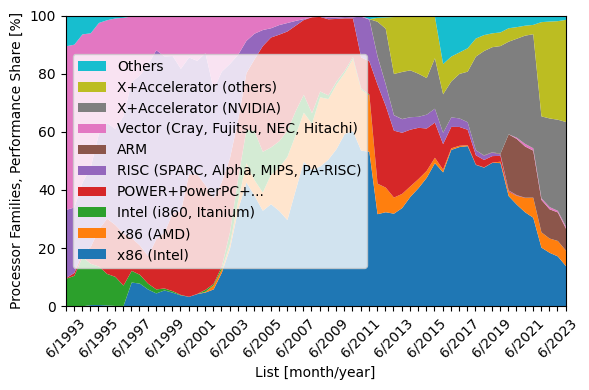

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

families=["x86 (Intel)","x86 (AMD)","Intel (i860, Itanium)","POWER+PowerPC+...","RISC (SPARC, Alpha, MIPS, PA-RISC)","ARM","Vector (Cray, Fujitsu, NEC, Hitachi)","X+Accelerator (NVIDIA)","X+Accelerator (others)","Others"]
counts=[]
i=0
for df in dfs:
#    print(dates[i])
#    df['Manufacturer'] = df['Manufacturer'].str.slice(0, 20)
    new_single_count=[]
    for element in families:
        new_single_count.append(0)
    new_sum=df["RMax"].sum()
    acc_column=None
    if "Accelerator/Co-Processor" in df.columns:
        acc_column="Accelerator/Co-Processor"
    for index, row in df.iterrows():
        element=row["Processor Family"]
        if acc_column != None and row[acc_column]!="None":
            if (row[acc_column].find("NVIDIA"))>-1:
                new_single_count[families.index("X+Accelerator (NVIDIA)")]+=row["RMax"]*100.0/new_sum
            else:
                new_single_count[families.index("X+Accelerator (others)")]+=row["RMax"]*100.0/new_sum
        elif element.find("Xeon")>-1 or element.find("Intel EM64T")>-1 or element.find("Intel IA32")>-1 or element.find("Intel IA-32")>-1 or element.find("Intel Core") > -1 or element.find("Core i5")>-1:
            new_single_count[0]+=row["RMax"]*100.0/new_sum
        elif element.find("Opteron")>-1 or element.find("AMD")>-1:
            new_single_count[1]+=row["RMax"]*100.0/new_sum
        elif element.find("Itanium")>-1 or element.find("IA-64")>-1 or element.find("i860")>-1:
            new_single_count[2]+=row["RMax"]*100.0/new_sum
        elif element.find("POWER")>-1 or element.find("Power")>-1:
            new_single_count[3]+=row["RMax"]*100.0/new_sum
        elif element.find("Sparc")>-1 or element.find("SPARC")>-1 or element.find("MIPS")>-1 or element.find("Alpha")>-1 or element.find("PA-RISC")>-1:
            new_single_count[families.index("RISC (SPARC, Alpha, MIPS, PA-RISC)")]+=row["RMax"]*100.0/new_sum
        elif element.find("Thunder")>-1 or element.find("ARM")>-1 or element.find("A64FX")>-1:
            new_single_count[families.index("ARM")]+=row["RMax"]*100.0/new_sum
        # must come after ARM!
        elif element.find("Cray")>-1 or element.find("Fujitsu")>-1 or element.find("NEC")>-1 or element.find("Hitachi")>-1 or element.find("Vector Engine")>-1:
            new_single_count[families.index("Vector (Cray, Fujitsu, NEC, Hitachi)")]+=row["RMax"]*100.0/new_sum
        else:
            new_single_count[len(families)-1]+=row["RMax"]*100.0/new_sum
    counts.append(new_single_count)
    i+=1
df_plot=pd.DataFrame(counts, columns=families)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Processor Families, Performance Share [%]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,100),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
#ax.get_legend().remove()
plt.savefig('processors-over-time-performance-accel.png', dpi=300)

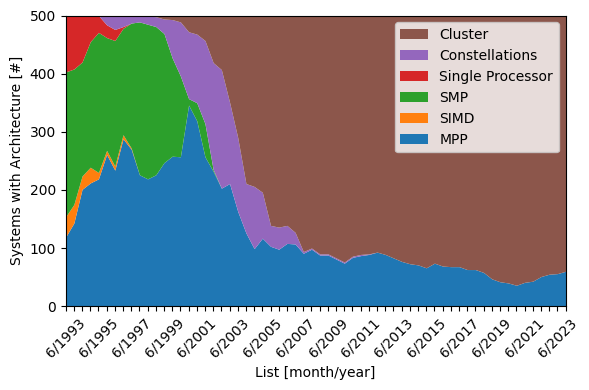

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

architectures=[]
counts=[]
i=0
for df in dfs:
#    print(dates[i])
#    df['Manufacturer'] = df['Manufacturer'].str.slice(0, 20)
    element_counts = Counter(df["Architecture"])
    for element in sorted(element_counts.keys()):
            if element not in architectures:
                for single_count in counts:
                    single_count.append(0)
                architectures.append(element)
    new_single_count=[]
    for element in architectures:
        new_single_count.append(element_counts[element])
    counts.append(new_single_count)
    i+=1
df_plot=pd.DataFrame(counts, columns=architectures)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Systems with Architecture [#]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,500),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
#ax.get_legend().remove()
plt.savefig('architecture.png', dpi=300)



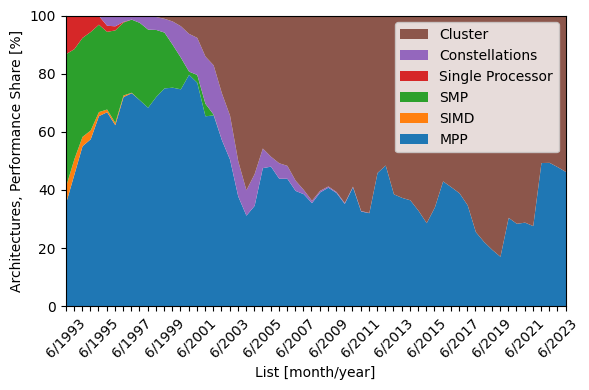

In [11]:
counts=[]
for df in dfs:
    new_single_count=[]
    for element in architectures:
        new_single_count.append(0)
    new_sum=df["RMax"].sum()
#    print(new_sum)
    for index, row in df.iterrows():
        a=row["Architecture"]
        new_single_count[architectures.index(a)]+=row["RMax"]*100.0/new_sum
    counts.append(new_single_count)
df_plot=pd.DataFrame(counts, columns=architectures)
ax=df_plot.plot.area(linewidth=0,
                  xlabel="List [month/year]",
                  ylabel="Architectures, Performance Share [%]",
                  xlim=(0,len(dfs)-1),
                  ylim=(0,100),
                  figsize=(6, 4)
                  )
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()
plt.legend(reverse=True)
plt.savefig('architecture_performance.png', dpi=300)

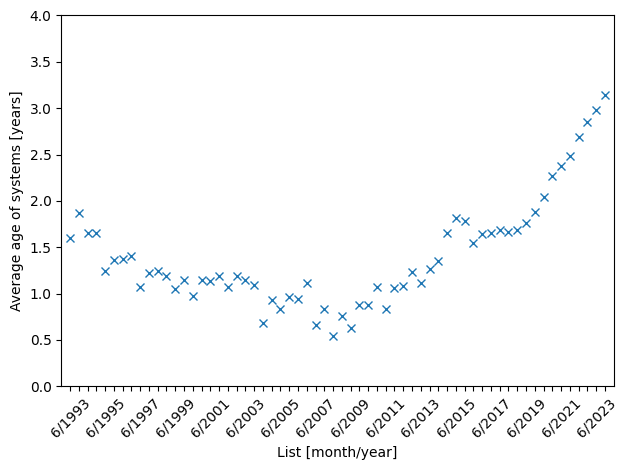

In [12]:
years=[]
i=0
for df in dfs:
    years.append(dates_years[i]+(0.5*(i%2))-df["Year"].sum()/500.0)
#    years.append(dates_years[i]-df["Year"][199])
    i+=1
fig, ax = plt.subplots()
plt.plot(range(len(years)),years,'x')
ax.set_xlim((-1,len(dates)))
ax.set_xlabel("List [month/year]")
ax.set_ylim((0,4))
ax.set_ylabel("Average age of systems [years]")
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()

6/1993 1122.845
 1466.21
 2233.8819999999996
 2622.3379999999997
6/1995 3927.029
 4784.547
 5894.544
 7981.229
6/1997 12844.358
 16898.131
 22625.134000000002
 29367.613999999998
6/1999 39062.579
 50938.556000000004
 64230.106
 88080.876
6/2001 108275.86600000001
 134977.506
 222245.166
 292713.56
6/2003 373063.56
 529241.568
 814895.674
 1130916.756
6/2005 1694716.6400000001
 2298496.69
 2790054.02
 3527458.3500000006
6/2007 4946586.05
 6966169.82
 11700016.97
 16927325.8
6/2009 22607996.299999997
 27977501.799999997
 32434683.700000003
 43673092.5
6/2011 58930025.6
 74069633.67999999
 123417786.71
 162139386.75
6/2013 223654338.12999997
 250080467.17000002
 273763781.09000003
 308850512.09
6/2015 362652490.36
 417807043.6
 567353038.81
 672112377.4899999
6/2017 748371889.0
 845120504.67
 1210914864.08
 1414955581.7800002
6/2019 1559575379.78
 1646887142.78
 2206134400.0
 2428761851.77
6/2021 2786058799.77
 3036861783.77
 4403083213.77
 4864384415.77
6/2023 5239024665.7699995
 7031841

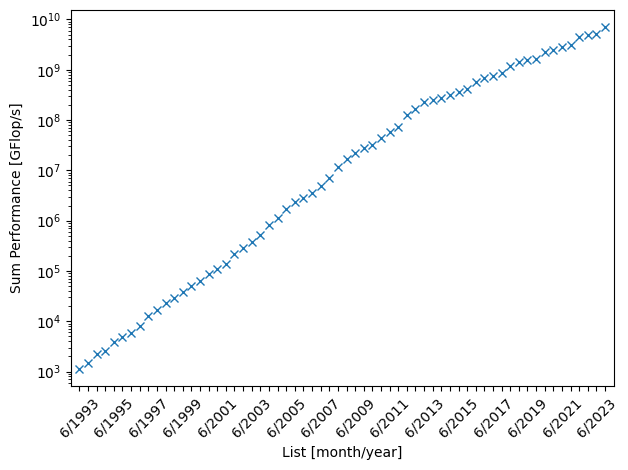

In [13]:
sum_flops=[]
i=0
for df in dfs:
    sum_flops.append(df["RMax"].sum())
#    years.append(dates_years[i]-df["Year"][199])
    i+=1
i=0
for x in sum_flops:
    print(dates[i],x)
    i+=1
fig, ax = plt.subplots()
plt.plot(range(len(sum_flops)),sum_flops,'x')
ax.set_xlim((-1,len(dates)))
ax.set_yscale("log",base=10)
ax.set_xlabel("List [month/year]")
ax.set_ylabel("Sum Performance [GFlop/s]")
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.tight_layout()

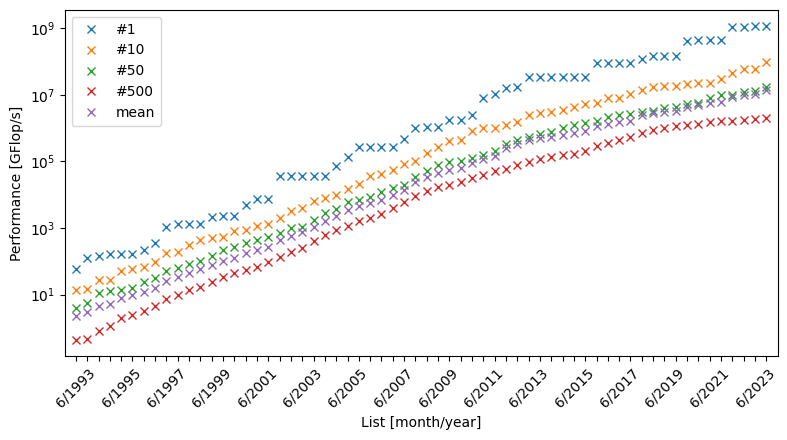

In [14]:
import numpy as np
import matplotlib.pyplot as plt

nr_1_flops=[]
nr_10_flops=[]
nr_50_flops=[]
nr_500_flops=[]
average_flops=[]
i=0
for df in dfs:
    nr_1_flops.append(df["RMax"][0])
    nr_10_flops.append(df["RMax"][9])
    nr_50_flops.append(df["RMax"][49])
    nr_500_flops.append(df["RMax"][499])
    average_flops.append(np.sum(df["RMax"])/500.0)
#    years.append(dates_years[i]-df["Year"][199])
    i+=1
fig, ax = plt.subplots(1,1,figsize=(8,9/2))
plt.plot(range(len(nr_1_flops)),nr_1_flops,'x', label="#1")
plt.plot(range(len(nr_10_flops)),nr_10_flops,'x', label="#10")
plt.plot(range(len(nr_50_flops)),nr_50_flops,'x', label="#50")
plt.plot(range(len(nr_500_flops)),nr_500_flops,'x', label="#500")
plt.plot(range(len(nr_500_flops)),average_flops,'x', label="mean")
ax.set_xlim((-1,len(dates)))
ax.set_yscale("log",base=10)
ax.set_xlabel("List [month/year]")
ax.set_ylabel("Performance [GFlop/s]")
ax.set_xticks(range(len(dates)),labels=dates,rotation = 45)
plt.legend()
plt.tight_layout()
plt.savefig('trend.png', dpi=300)